In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("./spotify_tracks_by_genre_sample.csv")
df.head()

,Track ID,Track Name,Artist Name,Album Name,Popularity,Acousticness,Danceability,Duration (ms),Energy,Instrumentalness,Tempo,Time Signature,Valence
0,003vvx7Niy0yvhvHt4a68B,Mr. Brightside,The Killers,Hot Fuss,88,0.001210,0.352,222973,0.911,0.000,148.033,4,0.2360
1,005mzp5KA5uOpxSqCLXpY2,Arranhão - Ao Vivo,Henrique & Juliano,Onde Haja Sol,0,0.617000,0.486,153410,0.871,0.000,151.175,4,0.6630
2,00ake6KfnzbZ2MaRLGqsyX,"Tum Kya Mile (From ""Rocky Aur Rani Kii Prem Ka...",Pritam,"Tum Kya Mile (From ""Rocky Aur Rani Kii Prem Ka...",66,0.586000,0.271,277500,0.726,0.000,87.425,4,0.5320
3,01Mpj13vURSO3cCLprPt5T,Raining Blood,Slayer,Reign In Blood,66,0.000489,0.294,254400,0.995,0.331,88.777,4,0.0379
4,01TyFEZu6mHbffsVfxgrFn,Show Me How,Men I Trust,Show Me How,85,0.674000,0.791,215111,0.267,0.534,165.990,4,0.5440


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949 entries, 0 to 948
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track ID          949 non-null    object 
 1   Track Name        949 non-null    object 
 2   Artist Name       949 non-null    object 
 3   Album Name        949 non-null    object 
 4   Popularity        949 non-null    int64  
 5   Acousticness      949 non-null    float64
 6   Danceability      949 non-null    float64
 7   Duration (ms)     949 non-null    int64  
 8   Energy            949 non-null    float64
 9   Instrumentalness  949 non-null    float64
 10  Tempo             949 non-null    float64
 11  Time Signature    949 non-null    int64  
 12  Valence           949 non-null    float64
dtypes: float64(6), int64(3), object(4)
memory usage: 96.5+ KB


In [4]:
df.shape

(949, 13)

In [5]:
df.isna().sum() 

Track ID            0
Track Name          0
Artist Name         0
Album Name          0
Popularity          0
Acousticness        0
Danceability        0
Duration (ms)       0
Energy              0
Instrumentalness    0
Tempo               0
Time Signature      0
Valence             0
dtype: int64

In [6]:
columns_count = len(df.columns)
columns = df.columns
columns_str = ', '.join(columns)

print('columns_count: ' + str(columns_count))
print('columns: ' + columns_str)

columns_count: 13
columns: Track ID, Track Name, Artist Name, Album Name, Popularity, Acousticness, Danceability, Duration (ms), Energy, Instrumentalness, Tempo, Time Signature, Valence


In [7]:
def convert_time_format(ms):
    total_seconds = int(ms / 1000)
    minutes = total_seconds // 60
    seconds = total_seconds % 60
    return f"{minutes}:{seconds:02d}"

In [8]:
df['Duration (formatted)'] = df['Duration (ms)'].apply(convert_time_format)

In [9]:
position = df.columns.get_loc('Duration (ms)') + 1
df.insert(position, 'Duration (formatted)', df.pop('Duration (formatted)'))
df.head()

,Track ID,Track Name,Artist Name,Album Name,Popularity,Acousticness,Danceability,Duration (ms),Duration (formatted),Energy,Instrumentalness,Tempo,Time Signature,Valence
0,003vvx7Niy0yvhvHt4a68B,Mr. Brightside,The Killers,Hot Fuss,88,0.001210,0.352,222973,3:42,0.911,0.000,148.033,4,0.2360
1,005mzp5KA5uOpxSqCLXpY2,Arranhão - Ao Vivo,Henrique & Juliano,Onde Haja Sol,0,0.617000,0.486,153410,2:33,0.871,0.000,151.175,4,0.6630
2,00ake6KfnzbZ2MaRLGqsyX,"Tum Kya Mile (From ""Rocky Aur Rani Kii Prem Ka...",Pritam,"Tum Kya Mile (From ""Rocky Aur Rani Kii Prem Ka...",66,0.586000,0.271,277500,4:37,0.726,0.000,87.425,4,0.5320
3,01Mpj13vURSO3cCLprPt5T,Raining Blood,Slayer,Reign In Blood,66,0.000489,0.294,254400,4:14,0.995,0.331,88.777,4,0.0379
4,01TyFEZu6mHbffsVfxgrFn,Show Me How,Men I Trust,Show Me How,85,0.674000,0.791,215111,3:35,0.267,0.534,165.990,4,0.5440


In [10]:
df_by_popularity = df.sort_values(by='Popularity', ascending=False)
top_100 = df_by_popularity.head(100)
artist_counts = top_100['Artist Name'].value_counts()
print(artist_counts)

Bad Bunny               7
Drake                   5
Jung Kook               4
Peso Pluma              4
Travis Scott            3
                       ..
Peggy Gou               1
Hotel Ugly              1
Rema                    1
Cigarettes After Sex    1
Evanescence             1
Name: Artist Name, Length: 69, dtype: int64


In [11]:
all_danceability_stats = df['Danceability'].describe()
print(all_danceability_stats)

count    949.000000
mean       0.577911
std        0.181092
min        0.000000
25%        0.469000
50%        0.589000
75%        0.705000
max        0.978000
Name: Danceability, dtype: float64


In [12]:
top_danceability_stats = top_100['Danceability'].describe()
print(top_danceability_stats)

count    100.00000
mean       0.64088
std        0.16820
min        0.00000
25%        0.55025
50%        0.64650
75%        0.77600
max        0.94300
Name: Danceability, dtype: float64


In [13]:
all_tempo_stats = df['Tempo'].describe()
print(all_tempo_stats)

count    949.000000
mean     122.105241
std       30.714412
min        0.000000
25%      100.020000
50%      123.752000
75%      140.962000
max      209.557000
Name: Tempo, dtype: float64


In [14]:
top_tempo_stats = top_100['Tempo'].describe()
print(top_tempo_stats)

count    100.000000
mean     119.395020
std       28.355658
min        0.000000
25%      100.908750
50%      119.968000
75%      138.108500
max      179.626000
Name: Tempo, dtype: float64


In [15]:
all_acousticness_stats = df['Acousticness'].describe()
print(all_acousticness_stats)

count    949.000000
mean       0.306478
std        0.329900
min        0.000000
25%        0.017200
50%        0.171000
75%        0.559000
max        0.995000
Name: Acousticness, dtype: float64


In [16]:
top_acousticness_stats = top_100['Acousticness'].describe()
print(top_acousticness_stats)

count    100.000000
mean       0.215346
std        0.235826
min        0.000008
25%        0.032050
50%        0.118000
75%        0.332750
max        0.868000
Name: Acousticness, dtype: float64


In [17]:
all_valence_stats = df['Valence'].describe()
print(all_valence_stats)

count    949.000000
mean       0.472822
std        0.256408
min        0.000000
25%        0.273000
50%        0.463000
75%        0.666000
max        0.981000
Name: Valence, dtype: float64


In [18]:
top_valence_stats = top_100['Valence'].describe()
print(top_valence_stats)

count    100.000000
mean       0.511300
std        0.244792
min        0.000000
25%        0.348750
50%        0.495500
75%        0.740750
max        0.964000
Name: Valence, dtype: float64


In [19]:
all_duration_stats = df['Duration (ms)'].describe()
print(all_duration_stats)

count    9.490000e+02
mean     2.206455e+05
std      8.355774e+04
min      3.398800e+04
25%      1.739680e+05
50%      2.115200e+05
75%      2.521870e+05
max      1.282000e+06
Name: Duration (ms), dtype: float64


In [20]:
top_duration_stats = top_100['Duration (ms)'].describe()
print(top_duration_stats)

count       100.000000
mean     210137.410000
std       45381.430721
min       90228.000000
25%      178532.000000
50%      212241.000000
75%      240713.250000
max      356067.000000
Name: Duration (ms), dtype: float64


In [21]:
top_10_artists = artist_counts.head(10)
artist_names = top_10_artists.index.tolist()  # Artist names
track_counts = top_10_artists.values  # Corresponding track counts

Text(0, 0.5, 'Artist')

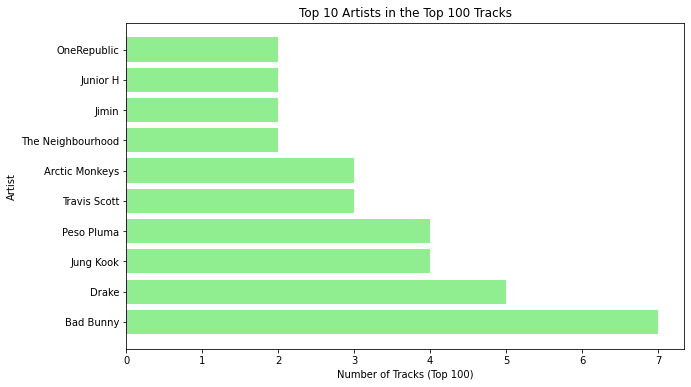

In [22]:
plt.figure(figsize=(10, 6))  # Optional: Set the size of the graph
plt.barh(artist_names, track_counts, color='lightgreen')

plt.title('Top 10 Artists in the Top 100 Tracks')
plt.xlabel('Number of Tracks (Top 100)')
plt.ylabel('Artist')

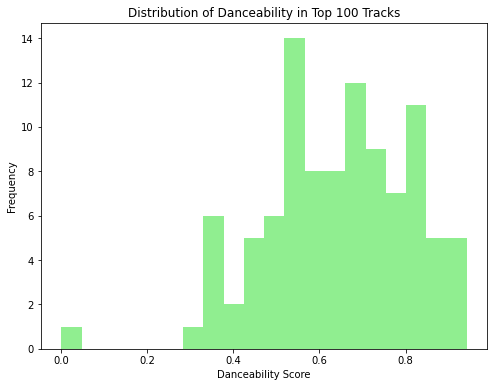

In [23]:
plt.figure(figsize=(8, 6))
top_100['Danceability'].plot(kind='hist', bins=20, color='lightgreen')
plt.title('Distribution of Danceability in Top 100 Tracks')
plt.xlabel('Danceability Score')
plt.ylabel('Frequency')
plt.show()

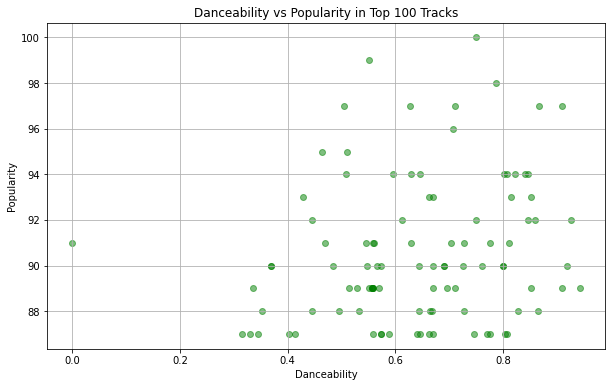

In [24]:
# Create a scatter plot of Danceability vs Popularity
plt.figure(figsize=(10, 6))  # Optional: Specify the figure size
plt.scatter(top_100['Danceability'], top_100['Popularity'], color='green', alpha=0.5)

# Add titles and labels
plt.title('Danceability vs Popularity in Top 100 Tracks')
plt.xlabel('Danceability')
plt.ylabel('Popularity')

# Optional: Add a grid for better readability
plt.grid(True)

# Show the plot
plt.show()

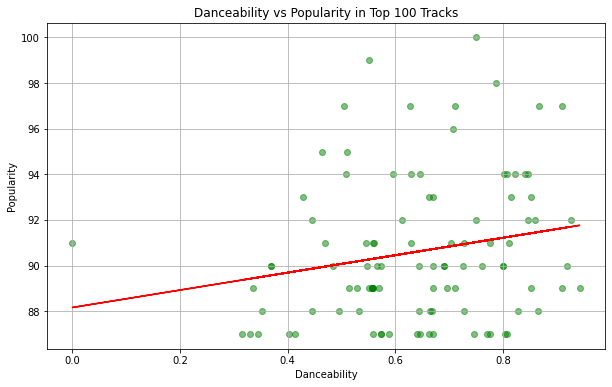

In [25]:
# Calculate coefficients for the linear fit
slope, intercept = np.polyfit(top_100['Danceability'], top_100['Popularity'], 1)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(top_100['Danceability'], top_100['Popularity'], color='green', alpha=0.5)

# Add the correlation line
plt.plot(top_100['Danceability'], slope*top_100['Danceability'] + intercept, color='red')

# Add titles and labels
plt.title('Danceability vs Popularity in Top 100 Tracks')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.grid(True)

# Show the plot
plt.show()

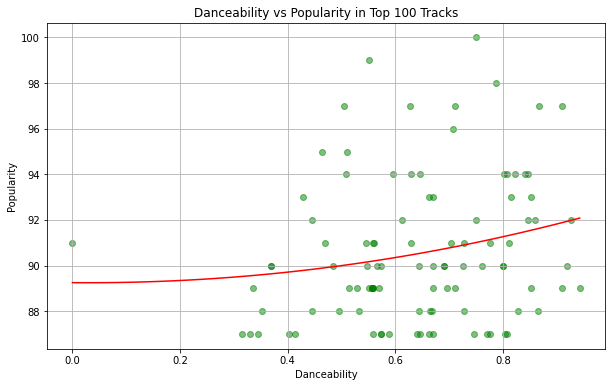

In [26]:
# Polynomial regression
polynomial_degree = 2  # Degree of the polynomial fit

# Calculate polynomial coefficients
poly_coeffs = np.polyfit(top_100['Danceability'], top_100['Popularity'], polynomial_degree)

# Generate polynomial equation
poly_eq = np.poly1d(poly_coeffs)

# Generate x values (Danceability) for plotting the polynomial line
x_poly = np.linspace(top_100['Danceability'].min(), top_100['Danceability'].max(), 100)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(top_100['Danceability'], top_100['Popularity'], color='green', alpha=0.5)

# Add the polynomial line
plt.plot(x_poly, poly_eq(x_poly), color='red')

# Add titles and labels
plt.title('Danceability vs Popularity in Top 100 Tracks')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.grid(True)

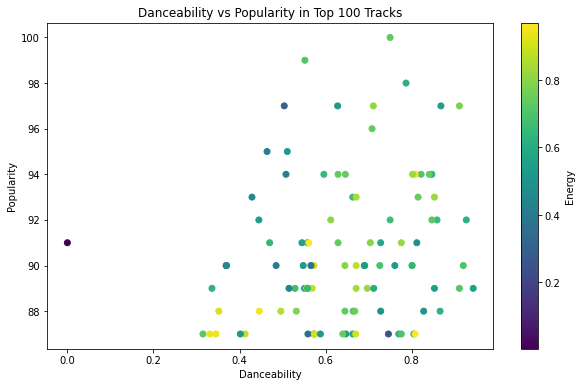

In [27]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(top_100['Danceability'], top_100['Popularity'], c=top_100['Energy'], cmap='viridis')


# Adding a color bar
plt.colorbar(scatter, label='Energy')

# Adding titles and labels
plt.title('Danceability vs Popularity in Top 100 Tracks')
plt.xlabel('Danceability')
plt.ylabel('Popularity')

plt.show()

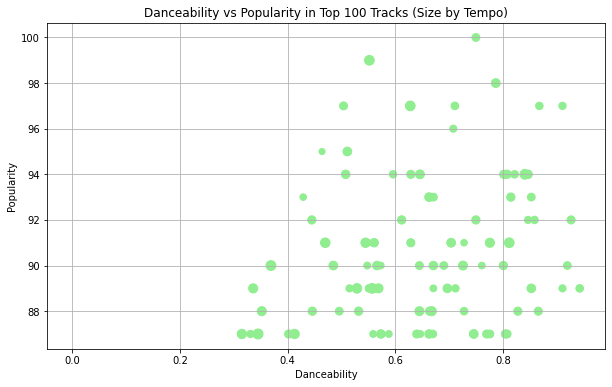

In [28]:
size = (top_100['Tempo'] - top_100['Tempo'].min()) / (top_100['Tempo'].max() - top_100['Tempo'].min()) * 100  # Normalizing and scaling

plt.figure(figsize=(10, 6))
plt.scatter(top_100['Danceability'], top_100['Popularity'], s=size, color='lightgreen')

plt.title('Danceability vs Popularity in Top 100 Tracks (Size by Tempo)')
plt.xlabel('Danceability')
plt.ylabel('Popularity')

plt.grid(True)

# Show the plot
plt.show()

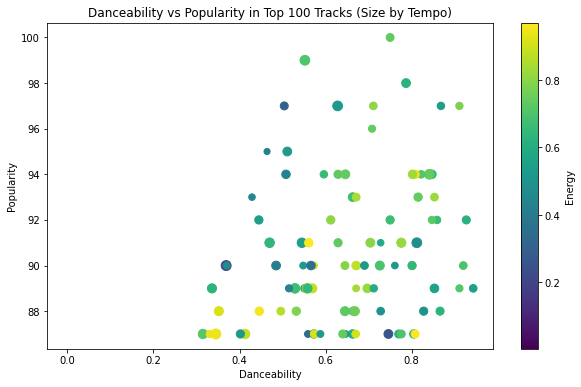

In [29]:
plt.figure(figsize=(10, 6))

size = (top_100['Tempo'] - top_100['Tempo'].min()) / (top_100['Tempo'].max() - top_100['Tempo'].min()) * 100  # Normalizing and scaling

scatter = plt.scatter(top_100['Danceability'], top_100['Popularity'], c=top_100['Energy'], cmap='viridis', s=size)

# Adding a color bar
plt.colorbar(scatter, label='Energy')

# Adding titles and labels
plt.title('Danceability vs Popularity in Top 100 Tracks (Size by Tempo)')
plt.xlabel('Danceability')
plt.ylabel('Popularity')

plt.show()